# Dimensionality reduction: PCA

The [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality) tells us that the more features we have then the more data we need to train a good model. Expanding on this, if you have a fixed amount of training data (which is often the case) your model's accuracy will decrease for every feature you have.

For images, we think of the number of features as the number of pixels. So for a 64x64 image we have 4096 features! One way to reduce that number (and hopefully produce a more accurate model) is to effectively compress the image. We do this by trying to find a way of keeping as much information as possible about the image without losing the essential structure.

Maintainer: [Márton Szép](mailto:marton.szep@tum.de)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torch

try:
    from sklearn.decomposition import PCA
except ModuleNotFoundError:
    !pip install scikit-learn
    from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%load_ext autoreload
%autoreload 2

### Load data

The number of data amount: 5000.
The type and shape of image: <class 'torch.Tensor'>, torch.Size([120, 120, 3]).
The ground truth data: [0.2000223696231842, -0.210123673081398, 1.12074875831604] 
 and its type: <class 'list'>.


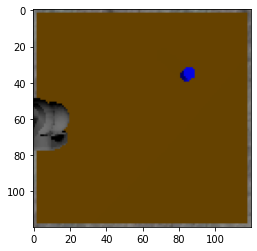

In [2]:
train_data = torch.load("data/training_data_extended.pt")
test_data = torch.load("data/test_data.pt")

print(f'The number of data amount: {len(train_data)}.')
print(f'The type and shape of image: {type(train_data[0][0])}, {train_data[0][0].shape}.')
print(f'The ground truth data: {train_data[0][1]} \n and its type: {type(train_data[0][1])}.')
plt.imshow(train_data[0][0])

The type and shape of image: <class 'numpy.ndarray'>, (120, 120).


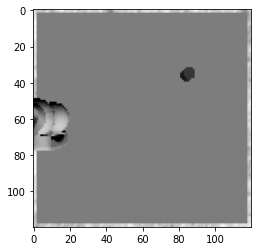

In [3]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

gray = rgb2gray(train_data[0][0])
print(f'The type and shape of image: {type(gray)}, {gray.shape}.')
plt.imshow(gray, cmap=plt.get_cmap('gray'))
plt.show()

In [4]:
X_train = []
for i in range(len(train_data)):
    X_train.append(rgb2gray(train_data[i][0]).reshape(-1))
X_train = np.array(X_train)    
X_train.shape

(5000, 14400)

The objective here is going to be to reduce the number of dimensions of the image, but before we do that we need to decide what we want to reduce it to. To do that we're going to try and find the number of dimensions that keeps 95% of the variance of the original images.

In [5]:
keep_variance = 0.90

pca_dims = PCA()
pca_dims.fit(X_train)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= keep_variance) + 1
print(f"Dimensionality of data has been reduced from {X_train.shape[1]} to {d}")

Dimensionality of data has been reduced from 14400 to 722


In [6]:
pca = PCA(n_components=d)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
print("reduced shape: " + str(X_reduced.shape))
print("recovered shape: " + str(X_recovered.shape))

reduced shape: (5000, 722)
recovered shape: (5000, 14400)


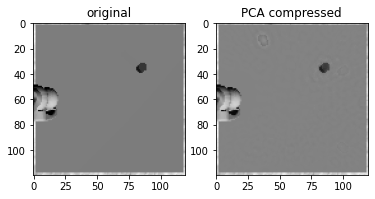

In [7]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((120,120)), cmap=plt.get_cmap('gray'))
f.add_subplot(1,2, 2)

plt.title("PCA compressed")
plt.imshow(X_recovered[0].reshape((120,120)), cmap=plt.get_cmap('gray'))
plt.show(block=True)